# **Analisis klaster pelanggan toko online**


## **Businnes Understanding**
Menggunakan algoritma K-means dan metodologi CRISP-DM untuk mengklaster pelanggan berdasarkan perilaku pembelian

## **Data Understanding**


In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# hubungkan ke gdrive
from google.colab import drive
path = '/content/drive'
drive.mount(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# membaca file dataset
file_path = f'{path}/My Drive/data mining tb/customer_shopping_data.csv'
df = pd.read_csv(file_path)
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


## **Data Preparation**

In [ ]:
# mencari apakah ada data null/NaN
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [ ]:
# Menghitung jumlah transaksi unik per pelanggan
frequences = df.groupby('customer_id')['invoice_no'].nunique().reset_index()

# Mengganti nama kolom untuk kejelasan
frequences.columns = ['customer_id', 'frequency']

frequences

,customer_id,frequency
0,C100004,1
1,C100005,1
2,C100006,1
3,C100012,1
4,C100019,1
...,...,...
99452,C999886,1
99453,C999910,1
99454,C999974,1
99455,C999976,1


In [ ]:
# Menggabungkan frekuensi pembelian dengan data asli
df_new = pd.merge(df, frequences, on='customer_id', how='left')
df_new

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,frequency
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,1
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,1
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,1
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,1
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,1
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,1
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,1


In [ ]:
# Menyimpan dataset yang telah digabungkan
file_path = f'{path}/My Drive/data mining tb/salinan_customer_shopping_data_new.csv'
df_new.to_csv(file_path, index=False)

In [ ]:
df_new

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,frequency
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,1
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,1
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,1
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,1
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,1
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,1
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,1


In [ ]:
df_new = df_new.rename(columns={'price': 'total_prices'})
df_new

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,invoice_date,shopping_mall,frequency
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,1
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,1
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,1
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,1
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,1
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,1
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,1


In [ ]:
# Membuat kolom total_price
df_new['unit_price'] = df_new['total_prices'] / df_new['quantity']
df_new

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,invoice_date,shopping_mall,frequency,unit_price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,1,300.08
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,1,600.17
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,1,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,1,600.17
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1,15.15
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,1,11.73
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,1,5.23
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,1,5.23
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,1,1050.00


In [ ]:
# Menyimpan dataset yang telah digabungkan
df_new.to_csv(file_path, index=False)

In [ ]:
# drop kolom yang tidak digunakan
column = ['shopping_mall', 'invoice_date', 'frequency']
df_new = df_new.drop(column, axis = 1)
df_new

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,unit_price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,300.08
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,600.17
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,600.17
4,I337046,C189076,Female,53,Books,4,60.60,Cash,15.15
...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,11.73
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,5.23
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,5.23
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,1050.00


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   total_prices    99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   unit_price      99457 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 6.8+ MB


In [ ]:
df_new.describe()

,age,quantity,total_prices,unit_price
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,229.280048
std,14.990054,1.413025,941.184567,266.047550
min,18.000000,1.000000,5.230000,5.230000
25%,30.000000,2.000000,45.450000,35.840000
50%,43.000000,3.000000,203.300000,40.660000
75%,56.000000,4.000000,1200.320000,300.080000
max,69.000000,5.000000,5250.000000,1050.000000


In [ ]:
grouped = df_new.groupby('category').size().reset_index(name='count')
duplicate_ids = grouped[grouped['count'] > 1]
duplicate_ids

,category,count
0,Books,4981
1,Clothing,34487
2,Cosmetics,15097
3,Food & Beverage,14776
4,Shoes,10034
5,Souvenir,4999
6,Technology,4996
7,Toys,10087


In [ ]:
# Mengonversi gender menjadi numerik
Gender = df_new['gender'].value_counts().reset_index()
Gender

,gender,count
0,Female,59482
1,Male,39975


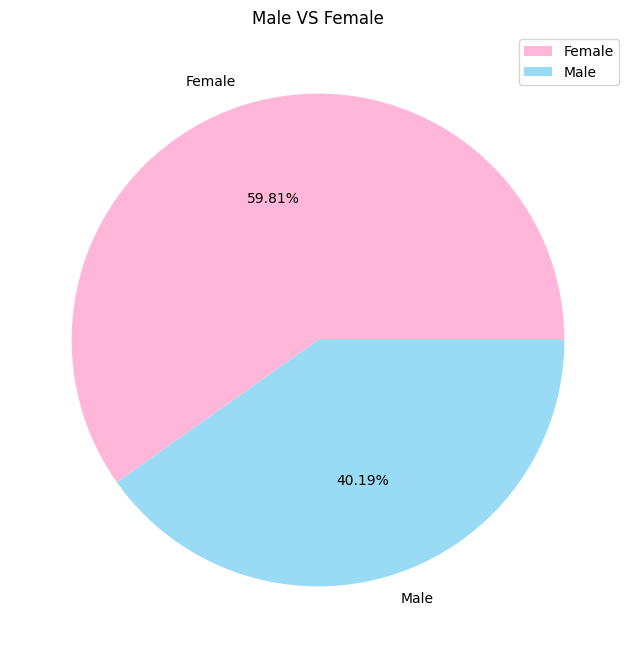

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(Gender['count'],
        labels=Gender['gender'],autopct='%1.2f%%',
        colors=["#FFB6D9", "#99DBF5"]
       )
plt.title('Male VS Female')
plt.legend()
plt.show()

In [ ]:
Category = df_new['category'].value_counts()
Category

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

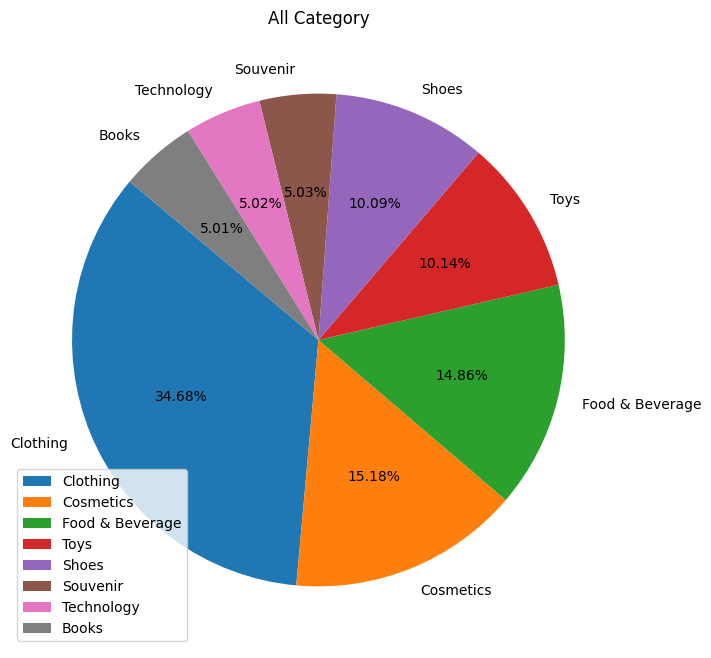

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(Category,
        labels=Category.index,autopct='%1.2f%%',
        startangle=140
       )
plt.title('All Category')
plt.legend()
plt.show()

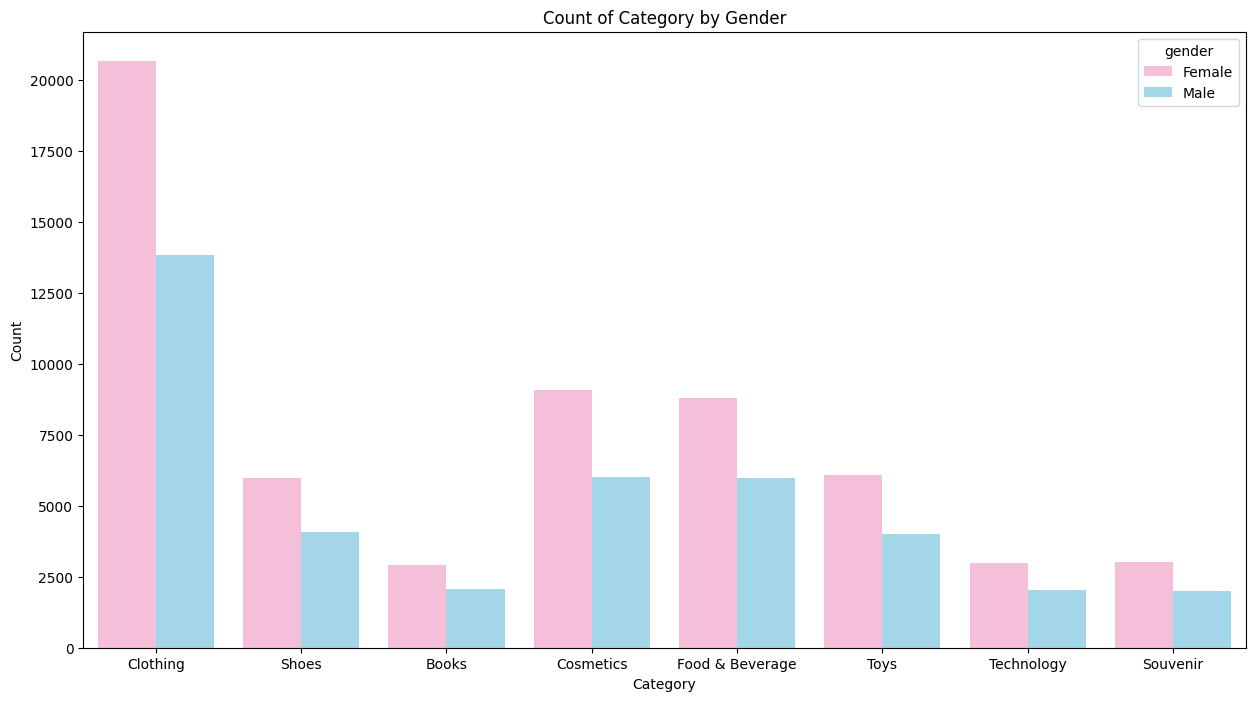

In [ ]:
plt.figure(figsize=(15, 8))
sn.countplot(data=df_new, x=df_new['category'], hue=df_new['gender'],palette=["#FFB6D9", "#99DBF5"])
plt.title('Count of Category by Gender')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
Age = df_new.groupby(['age', 'gender']).size().reset_index(name='count')
Age

,age,gender,count
0,18,Female,1079
1,18,Male,765
2,19,Female,1133
3,19,Male,803
4,20,Female,1102
...,...,...,...
99,67,Male,766
100,68,Female,1148
101,68,Male,745
102,69,Female,1143


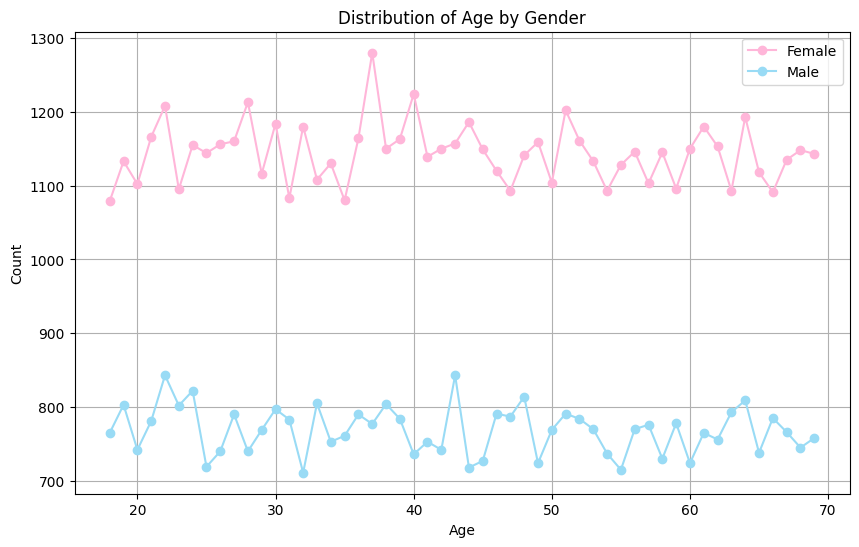

In [ ]:
plt.figure(figsize=(10, 6))

# Memisahkan data berdasarkan gender
for gender, color in zip(df_new['gender'].unique(), ["#FFB6D9", "#99DBF5"]):
    plt.plot('age', 'count', data=Age[Age['gender']==gender], marker='o', color=color, label=gender)

# Menambahkan judul dan label
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()

In [ ]:
count_category = df_new.groupby(['category', 'gender']).size().reset_index(name='count')
count_category

,category,gender,count
0,Books,Female,2906
1,Books,Male,2075
2,Clothing,Female,20652
3,Clothing,Male,13835
4,Cosmetics,Female,9070
5,Cosmetics,Male,6027
6,Food & Beverage,Female,8804
7,Food & Beverage,Male,5972
8,Shoes,Female,5967
9,Shoes,Male,4067


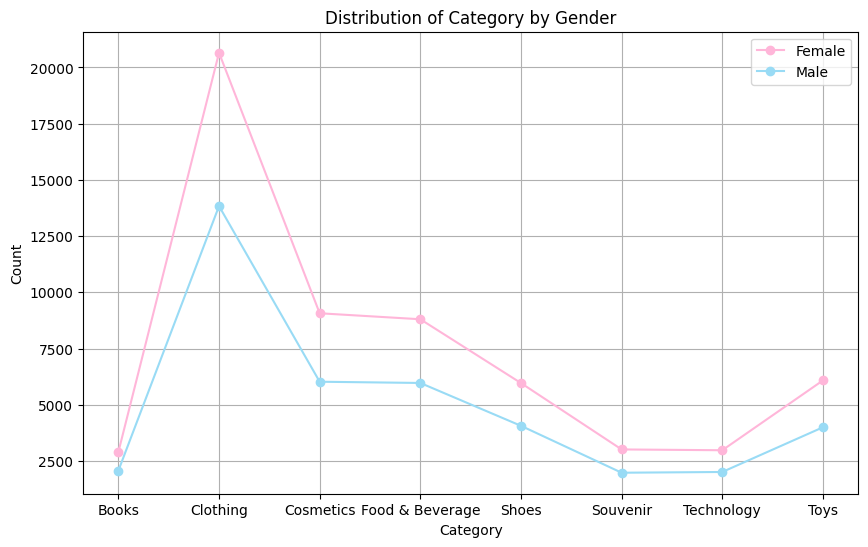

In [ ]:
plt.figure(figsize=(10, 6))

# Memisahkan data berdasarkan gender
for gender, color in zip(df_new['gender'].unique(), ["#FFB6D9", "#99DBF5"]):
    plt.plot('category', 'count', data=count_category[count_category['gender']==gender], marker='o', color=color, label=gender)

# Menambahkan judul dan label
plt.title('Distribution of Category by Gender')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()

In [ ]:
# Membuat mapping dari kategori ke angka
category_mapping = {category: idx for idx, category in enumerate(df_new['category'].unique())}
df_new['category'] = df_new['category'].map(category_mapping)

In [ ]:
df_new['gender'] = df_new['gender'].map({'Male': 1, 'Female': 0})

In [ ]:
payment_method_mapping = {payment_method: idx for idx, payment_method in enumerate(df_new['payment_method'].unique())}
df_new['payment_method'] = df_new['payment_method'].map(payment_method_mapping)

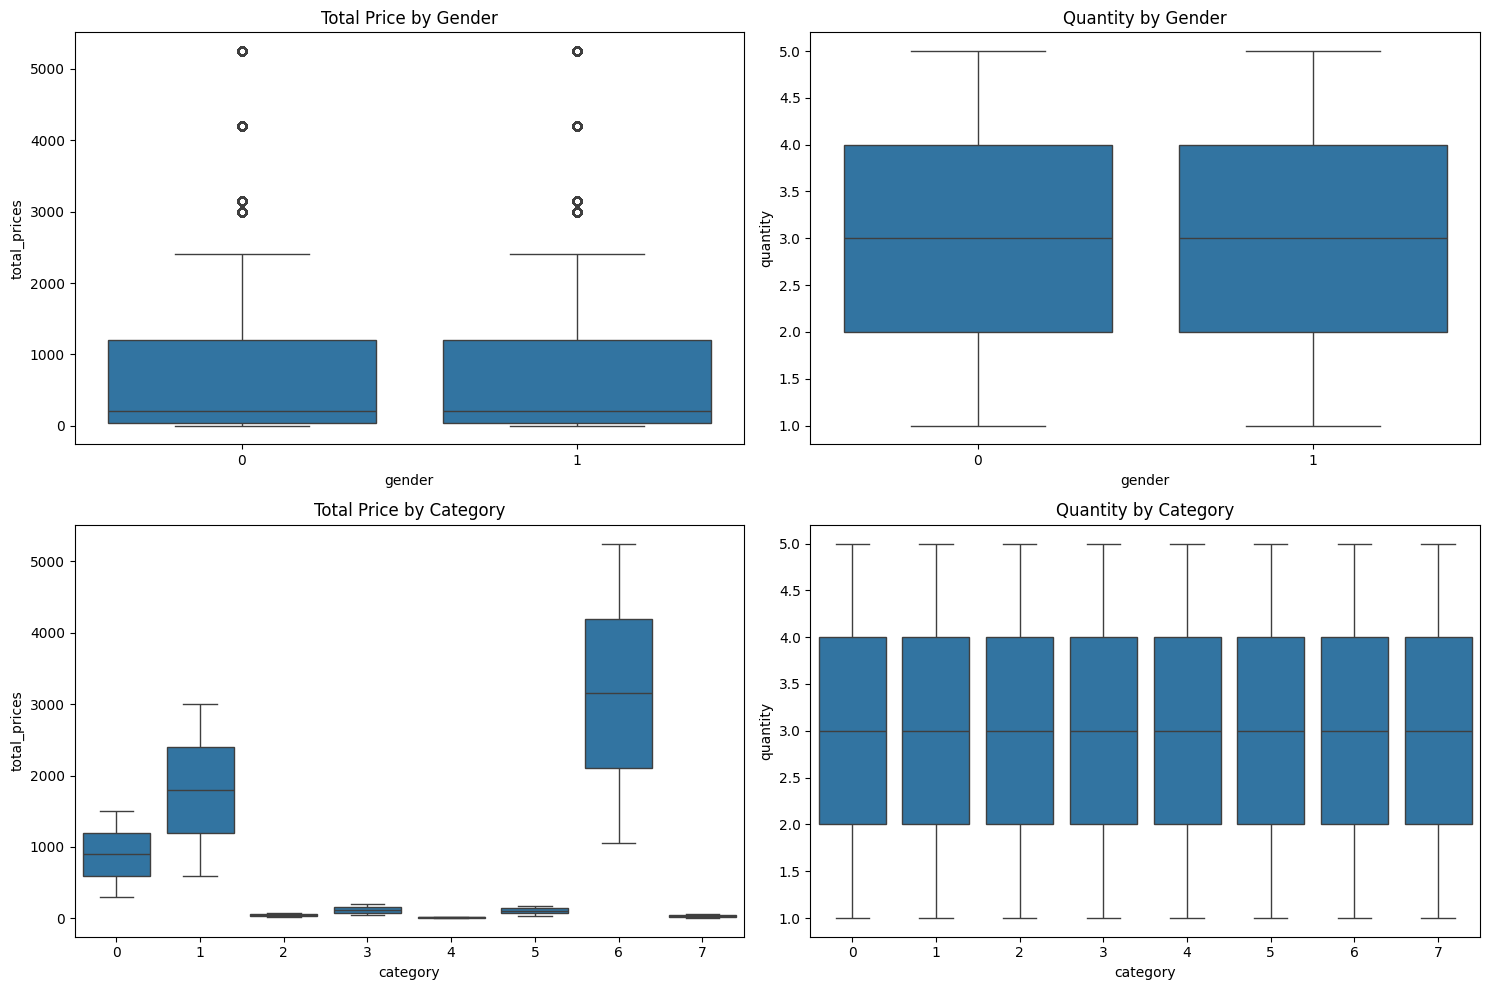

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Box plot for 'total_price' separated by 'gender'
plt.subplot(2, 2, 1)
sn.boxplot(x='gender', y='total_prices', data=df_new)
plt.title('Total Price by Gender')

# Box plot for 'quantity' separated by 'gender'
plt.subplot(2, 2, 2)
sn.boxplot(x='gender', y='quantity', data=df_new)
plt.title('Quantity by Gender')

# Box plot for 'total_price' separated by 'category'
plt.subplot(2, 2, 3)
sn.boxplot(x='category', y='total_prices', data=df_new)
plt.title('Total Price by Category')

# Box plot for 'quantity' separated by 'category'
plt.subplot(2, 2, 4)
sn.boxplot(x='category', y='quantity', data=df_new)
plt.title('Quantity by Category')

plt.tight_layout()
plt.show()


In [ ]:
df_new.head()

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,unit_price
0,I138884,C241288,0,28,0,5,1500.40,0,300.08
1,I317333,C111565,1,21,1,3,1800.51,1,600.17
2,I127801,C266599,1,20,0,1,300.08,2,300.08
3,I173702,C988172,0,66,1,5,3000.85,0,600.17
4,I337046,C189076,0,53,2,4,60.60,2,15.15


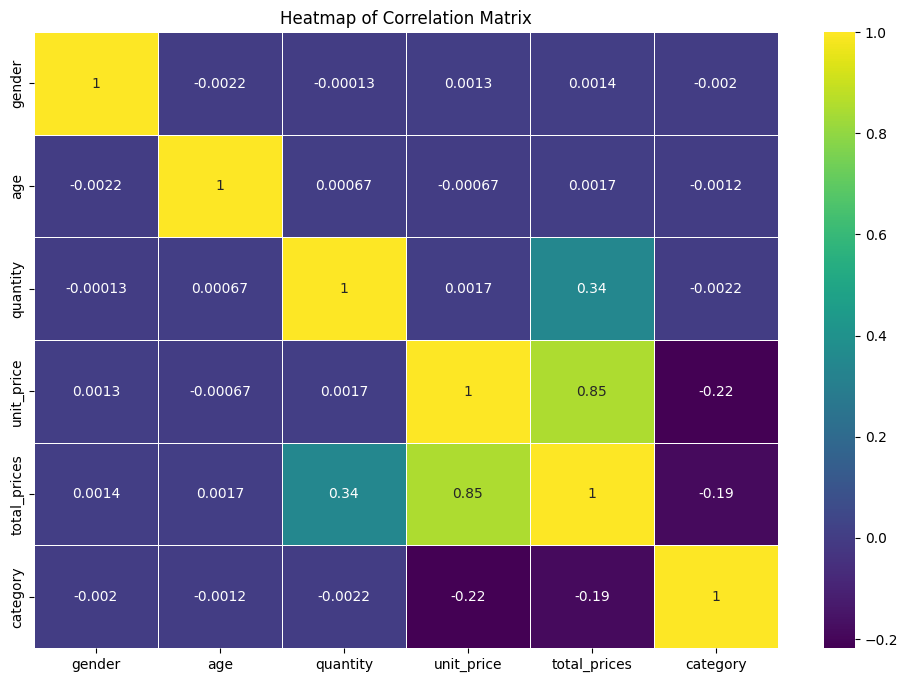

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df_new[['gender', 'age', 'quantity', 'unit_price', 'total_prices', 'category']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Membuat heatmap
sn.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)

plt.title('Heatmap of Correlation Matrix')
plt.show()


## **Modeling**

### Quantity, Total Prices

In [ ]:
# mengambil fitur kolom ke 5 dan 6
X_qt = df_new.iloc[:,[5,6]].values
X_qt

array([[5.00000e+00, 1.50040e+03],
       [3.00000e+00, 1.80051e+03],
       [1.00000e+00, 3.00080e+02],
       ...,
       [2.00000e+00, 1.04600e+01],
       [4.00000e+00, 4.20000e+03],
       [3.00000e+00, 3.51900e+01]])

In [ ]:
scaler_qt = StandardScaler()
X_qt = scaler_qt.fit_transform(X_qt)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

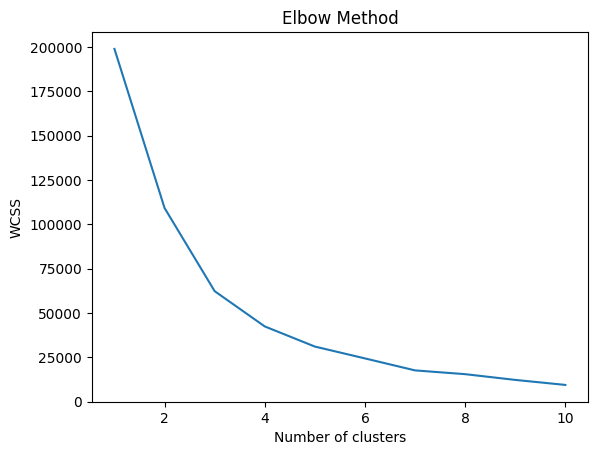

In [ ]:
# menggunakan metode elbow
wcss_qt = []
for i in range(1, 11):
    kmeans_qt = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_qt.fit(X_qt)
    wcss_qt.append(kmeans_qt.inertia_)

plt.plot(range(1, 11), wcss_qt)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### K=4

In [ ]:
# gunakan algoritma k means dengan k=4
kmeans_qt = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels_qt = kmeans_qt.fit_predict(X_qt)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# inisialisasi centroid
centroid_qt = kmeans_qt.cluster_centers_

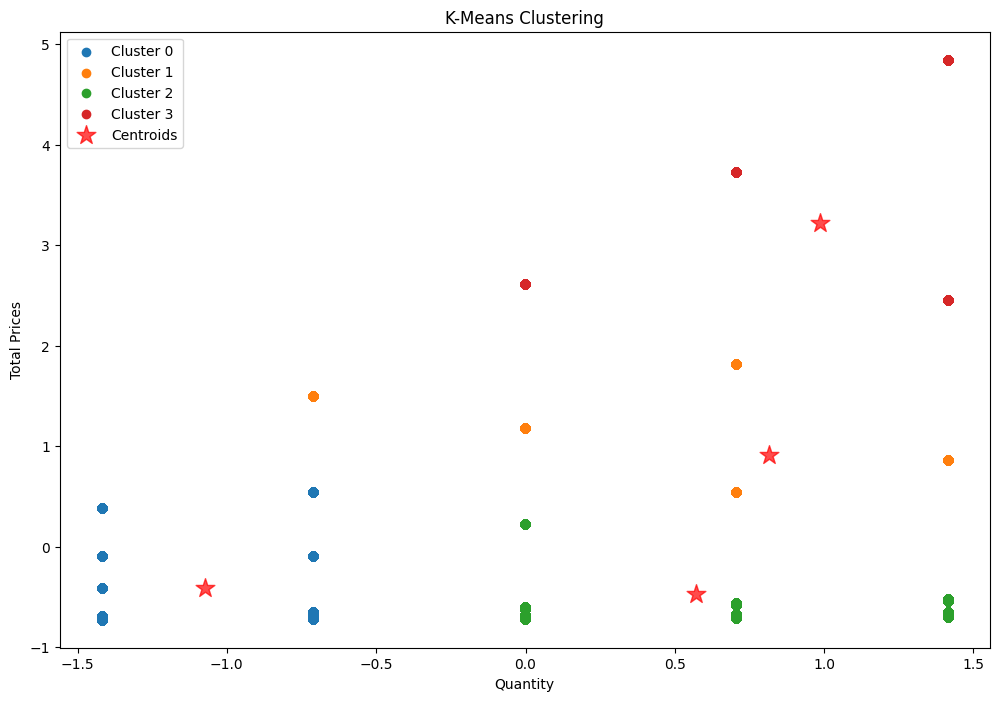

In [ ]:
jmmjj# Visualisasi klaster
plt.figure(figsize=(12, 8))

# Memisahkan data berdasarkan klaster
for i in range(4):
    plt.scatter(X_qt[labels_qt == i, 0], X_qt[labels_qt == i, 1], label=f'Cluster {i}')

# Menampilkan centroid
plt.scatter(centroid_qt[:, 0], centroid_qt[:, 1], marker='*', c='red', s=200, alpha=0.7, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Quantity')
plt.ylabel('Total Prices')

# Menambahkan legenda
plt.legend()

plt.show()

In [ ]:
centroid_qt

array([[-1.07259311, -0.41349772],
       [ 0.81545212,  0.91647986],
       [ 0.56965282, -0.47158692],
       [ 0.98771265,  3.21787618]])

In [ ]:
df_new['claster_qt'] = labels_qt
df_new

# 0 : Low Quantity, Low Price
# 1 : High Quantity, Medium Price
# 2 : High Quantity, Low Price
# 3 : High Quantity, High Price

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,unit_price,claster_qt
0,I138884,C241288,0,28,0,5,1500.40,0,300.08,1
1,I317333,C111565,1,21,1,3,1800.51,1,600.17,1
2,I127801,C266599,1,20,0,1,300.08,2,300.08,0
3,I173702,C988172,0,66,1,5,3000.85,0,600.17,3
4,I337046,C189076,0,53,2,4,60.60,2,15.15,2
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,0,45,7,5,58.65,0,11.73,2
99453,I325143,C569580,1,27,4,2,10.46,2,5.23,0
99454,I824010,C103292,1,63,4,2,10.46,1,5.23,0
99455,I702964,C800631,1,56,6,4,4200.00,2,1050.00,3


In [ ]:
cluster_qt = df_new[df_new['claster_qt'] == 1]
cluster_qt

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,unit_price,claster_qt
0,I138884,C241288,0,28,0,5,1500.40,0,300.08,1
1,I317333,C111565,1,21,1,3,1800.51,1,600.17,1
5,I227836,C657758,0,28,0,5,1500.40,0,300.08,1
27,I217053,C192344,1,50,1,4,2400.68,2,600.17,1
28,I655874,C447138,0,65,1,3,1800.51,2,600.17,1
...,...,...,...,...,...,...,...,...,...,...
99405,I651573,C425890,1,56,1,3,1800.51,1,600.17,1
99430,I336082,C316368,1,26,0,5,1500.40,2,300.08,1
99436,I579905,C265057,0,57,0,5,1500.40,2,300.08,1
99442,I105959,C131810,0,45,0,4,1200.32,1,300.08,1


### Category, Total Prices

In [ ]:
X_ct = df_new.iloc[:,[4,6]].values
X_ct

array([[0.00000e+00, 1.50040e+03],
       [1.00000e+00, 1.80051e+03],
       [0.00000e+00, 3.00080e+02],
       ...,
       [4.00000e+00, 1.04600e+01],
       [6.00000e+00, 4.20000e+03],
       [7.00000e+00, 3.51900e+01]])

In [ ]:
scaler_ct = StandardScaler()
X_ct = scaler_ct.fit_transform(X_ct)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

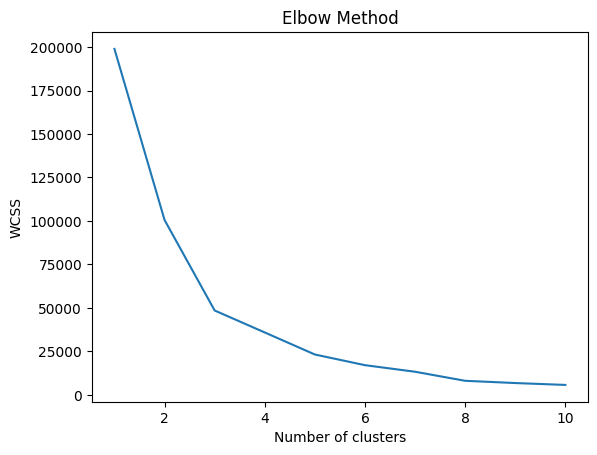

In [ ]:
wcss_ct = []
for i in range(1, 11):
    kmeans_ct = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_ct.fit(X_ct)
    wcss_ct.append(kmeans_ct.inertia_)

plt.plot(range(1, 11), wcss_ct)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### K=4

In [ ]:
kmeans_ct = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels_ct = kmeans_ct.fit_predict(X_ct)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroid_ct = kmeans_ct.cluster_centers_

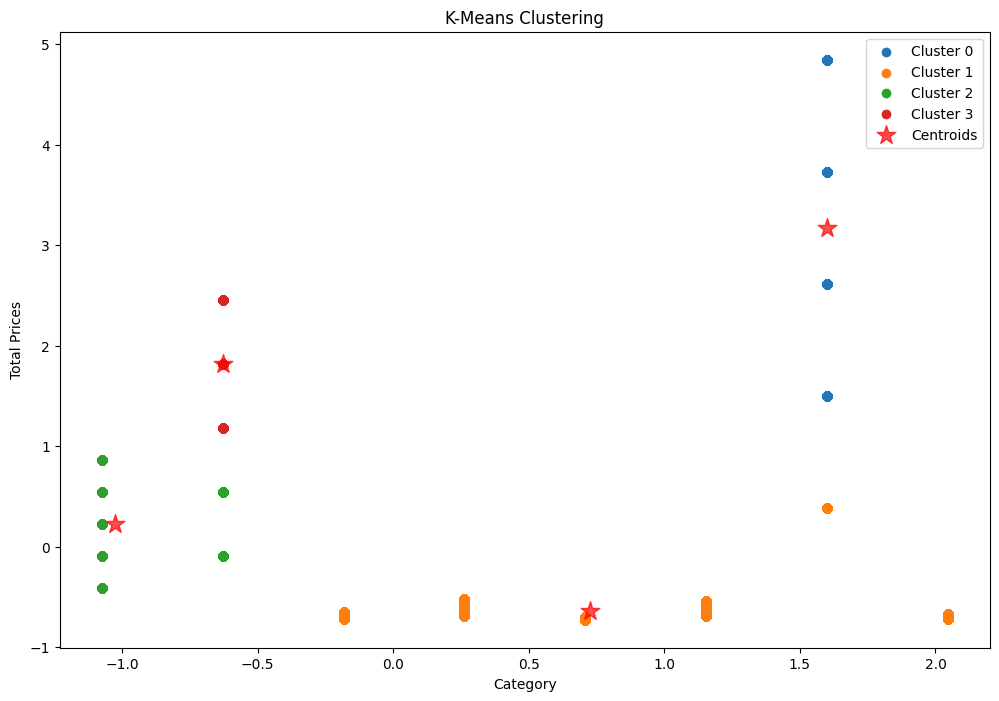

In [ ]:
# Visualisasi klaster
plt.figure(figsize=(12, 8))

# Memisahkan data berdasarkan klaster
for i in range(4):
    plt.scatter(X_ct[labels_ct == i, 0], X_ct[labels_ct == i, 1], label=f'Cluster {i}')

# Menampilkan centroid
plt.scatter(centroid_ct[:, 0], centroid_ct[:, 1], marker='*', c='red', s=200, alpha=0.7, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Category')
plt.ylabel('Total Prices')

# Menambahkan legenda
plt.legend()

plt.show()

In [ ]:
centroid_ct

array([[ 1.59895217,  3.17164597],
       [ 0.72536576, -0.63630501],
       [-1.02797785,  0.22581176],
       [-0.62864725,  1.81869762]])

In [ ]:
df_new['claster_ct'] = labels_ct
df_new

# 0 : High Category, High Price
# 1 : Medium Category, Low Price
# 2 : Low Category, Low Price
# 3 : Low Category, Medium Price

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,unit_price,claster_qt,claster_ct
0,I138884,C241288,0,28,0,5,1500.40,0,300.08,1,2
1,I317333,C111565,1,21,1,3,1800.51,1,600.17,1,3
2,I127801,C266599,1,20,0,1,300.08,2,300.08,0,2
3,I173702,C988172,0,66,1,5,3000.85,0,600.17,3,3
4,I337046,C189076,0,53,2,4,60.60,2,15.15,2,1
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,0,45,7,5,58.65,0,11.73,2,1
99453,I325143,C569580,1,27,4,2,10.46,2,5.23,0,1
99454,I824010,C103292,1,63,4,2,10.46,1,5.23,0,1
99455,I702964,C800631,1,56,6,4,4200.00,2,1050.00,3,0


In [ ]:
cluster_ct = df_new[df_new['claster_ct'] == 1]
cluster_ct

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,unit_price,claster_qt,claster_ct
4,I337046,C189076,0,53,2,4,60.60,2,15.15,2,1
6,I121056,C151197,0,49,3,1,40.66,2,40.66,0,1
10,I306368,C240286,0,36,4,2,10.46,2,5.23,0,1
11,I139207,C191708,0,29,2,1,15.15,0,15.15,0,1
12,I640508,C225330,0,67,5,4,143.36,1,35.84,2,1
...,...,...,...,...,...,...,...,...,...,...,...
99451,I675411,C513603,1,50,5,5,179.20,2,35.84,2,1
99452,I219422,C441542,0,45,7,5,58.65,0,11.73,2,1
99453,I325143,C569580,1,27,4,2,10.46,2,5.23,0,1
99454,I824010,C103292,1,63,4,2,10.46,1,5.23,0,1


### Age, Total Prices

In [ ]:
X_at = df_new.iloc[:,[6,3]].values
X_at

array([[1500.4 ,   28.  ],
       [1800.51,   21.  ],
       [ 300.08,   20.  ],
       ...,
       [  10.46,   63.  ],
       [4200.  ,   56.  ],
       [  35.19,   36.  ]])

In [ ]:
scaler_at = StandardScaler()
X_at = scaler_at.fit_transform(X_at)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

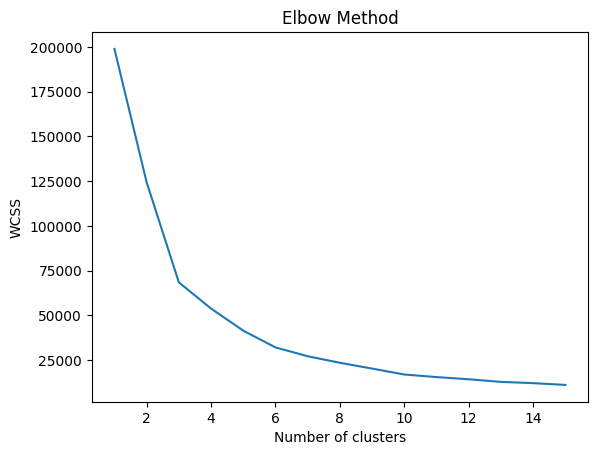

In [ ]:
wcss_at = []
for i in range(1, 16):
    kmeans_at = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_at.fit(X_at)
    wcss_at.append(kmeans_at.inertia_)

plt.plot(range(1, 16), wcss_at)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### K=6

In [ ]:
kmeans_at = KMeans(n_clusters=8, init='k-means++', random_state=42)
labels_at = kmeans_at.fit_predict(X_at)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroid_at = kmeans_at.cluster_centers_

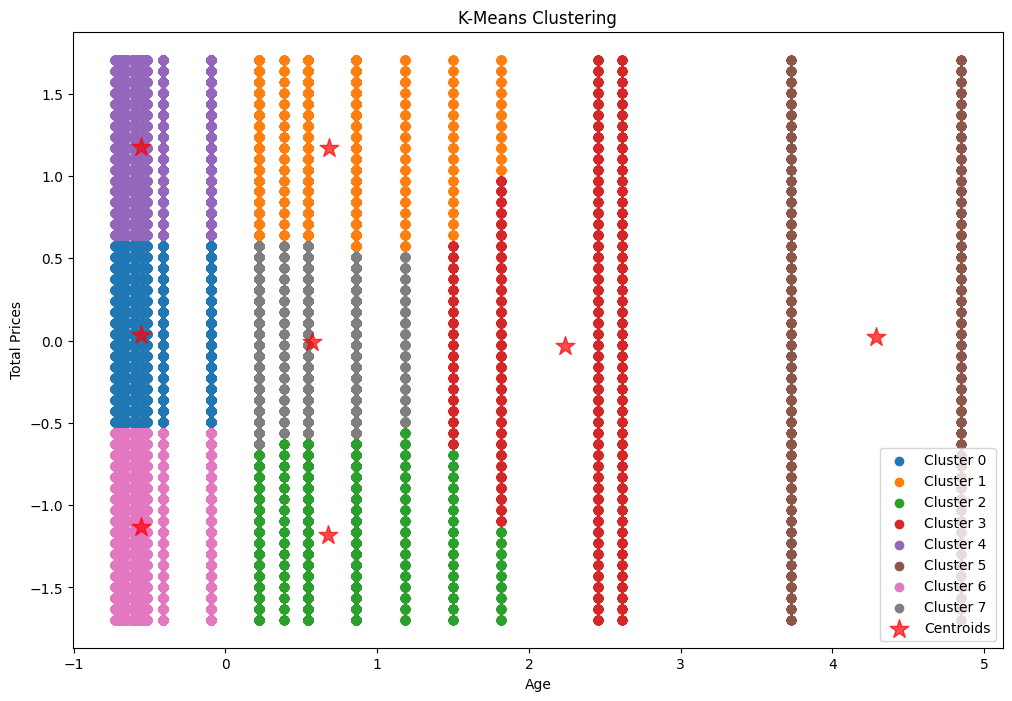

In [ ]:
# Visualisasi klaster
plt.figure(figsize=(12, 8))

# Memisahkan data berdasarkan klaster
for i in range(8):
    plt.scatter(X_at[labels_at == i, 0], X_at[labels_at == i, 1], label=f'Cluster {i}')

# Menampilkan centroid
plt.scatter(centroid_at[:, 0], centroid_at[:, 1], marker='*', c='red', s=200, alpha=0.7, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Total Prices')

# Menambahkan legenda
plt.legend()

plt.show()

In [ ]:
centroid_at

array([[-0.55531737,  0.03389206],
       [ 0.68145031,  1.17244048],
       [ 0.67445461, -1.17906672],
       [ 2.23819545, -0.03336702],
       [-0.5550546 ,  1.17395425],
       [ 4.28796233,  0.02242483],
       [-0.5547537 , -1.13196385],
       [ 0.57039041, -0.01025549]])

In [ ]:
df_new['claster_at'] = labels_at
df_new

# 0 : High Quantity, Low Price
# 1 : Low Quantity, Low Price
# 2 : Hight Quantity, Hight Price

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,unit_price,claster_qt,claster_ct,claster_at
0,I138884,C241288,0,28,0,5,1500.40,0,300.08,1,2,2
1,I317333,C111565,1,21,1,3,1800.51,1,600.17,1,3,2
2,I127801,C266599,1,20,0,1,300.08,2,300.08,0,2,6
3,I173702,C988172,0,66,1,5,3000.85,0,600.17,3,3,3
4,I337046,C189076,0,53,2,4,60.60,2,15.15,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,0,45,7,5,58.65,0,11.73,2,1,0
99453,I325143,C569580,1,27,4,2,10.46,2,5.23,0,1,6
99454,I824010,C103292,1,63,4,2,10.46,1,5.23,0,1,4
99455,I702964,C800631,1,56,6,4,4200.00,2,1050.00,3,0,5


In [ ]:
cluster_at = df_new[df_new['claster_at'] == 1]
cluster_at

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,unit_price,claster_qt,claster_ct,claster_at
8,I293455,C159642,1,69,0,3,900.24,0,300.08,2,2,1
28,I655874,C447138,0,65,1,3,1800.51,2,600.17,1,3,1
34,I167211,C164092,0,66,1,4,2400.68,0,600.17,1,3,1
60,I133061,C336576,1,64,0,5,1500.40,0,300.08,1,2,1
63,I157285,C123427,1,66,0,4,1200.32,2,300.08,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99407,I458636,C156575,0,67,0,3,900.24,2,300.08,2,2,1
99417,I694098,C221548,0,66,1,2,1200.34,2,600.17,0,2,1
99435,I141871,C298790,0,62,0,3,900.24,2,300.08,2,2,1
99436,I579905,C265057,0,57,0,5,1500.40,2,300.08,1,2,1


### Category, Quantity

In [ ]:
X_cq = df_new.iloc[:,[4,5]].values
X_cq

array([[0, 5],
       [1, 3],
       [0, 1],
       ...,
       [4, 2],
       [6, 4],
       [7, 3]])

In [ ]:
scaler_cq = StandardScaler()
X_cq = scaler_cq.fit_transform(X_cq)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

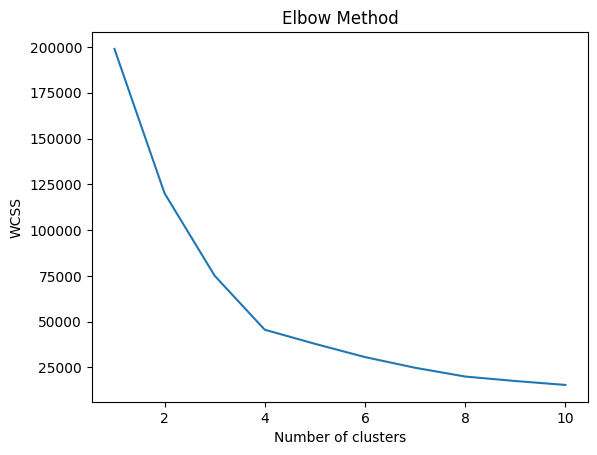

In [ ]:
wcss_cq = []
for i in range(1, 11):
    kmeans_cq = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_cq.fit(X_cq)
    wcss_cq.append(kmeans_cq.inertia_)

plt.plot(range(1, 11), wcss_cq)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### K=4

In [ ]:
kmeans_cq = KMeans(n_clusters=6, init='k-means++', random_state=42)
labels_cq = kmeans_cq.fit_predict(X_cq)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroid_cq = kmeans_cq.cluster_centers_

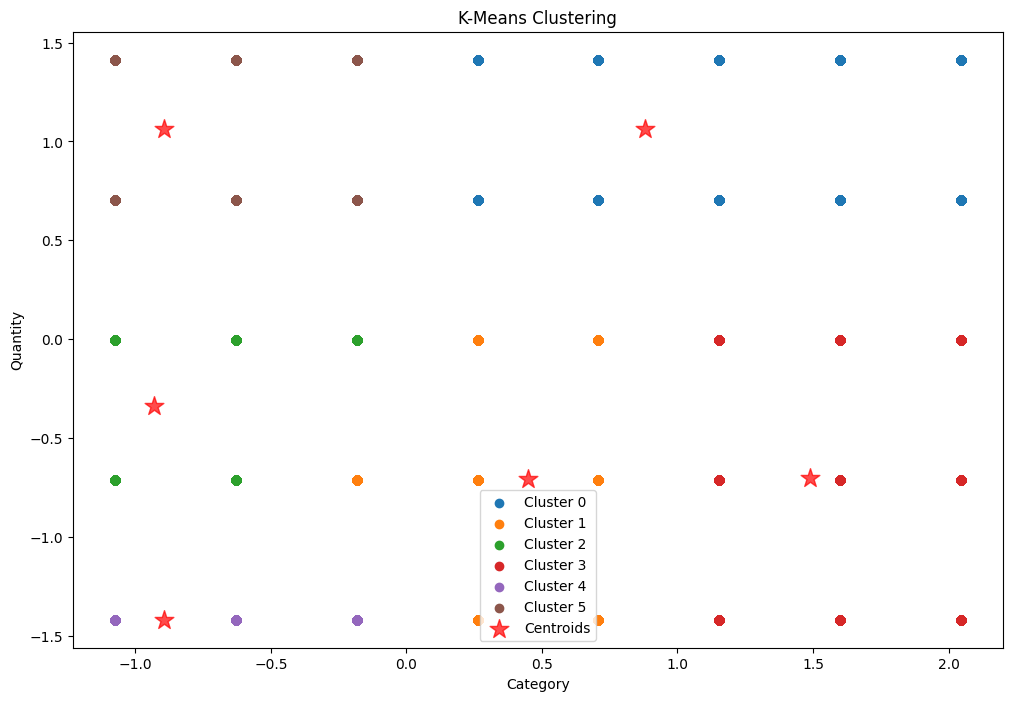

In [ ]:
# Visualisasi klaster
plt.figure(figsize=(12, 8))

# Memisahkan data berdasarkan klaster
for i in range(6):
    plt.scatter(X_cq[labels_cq == i, 0], X_cq[labels_cq == i, 1], label=f'Cluster {i}')

# Menampilkan centroid
plt.scatter(centroid_cq[:, 0], centroid_cq[:, 1], marker='*', c='red', s=200, alpha=0.7, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Category')
plt.ylabel('Quantity')

# Menambahkan legenda
plt.legend()

plt.show()

In [ ]:
centroid_cq

array([[ 0.88091766,  1.0611759 ],
       [ 0.4480748 , -0.70729216],
       [-0.93152633, -0.33902792],
       [ 1.49032017, -0.70084649],
       [-0.89568558, -1.41783656],
       [-0.89402077,  1.06184593]])

In [ ]:
df_new['claster_cq'] = labels_cq
df_new

# 0 : High Category, High Quantity
# 1 : Medium Category, Low Quantity
# 2 : Low Category, Low Quantity
# 3 : Low Category, Medium Quantity

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,unit_price,claster_qt,claster_ct,claster_at,claster_cq
0,I138884,C241288,0,28,0,5,1500.40,0,300.08,1,2,2,5
1,I317333,C111565,1,21,1,3,1800.51,1,600.17,1,3,2,2
2,I127801,C266599,1,20,0,1,300.08,2,300.08,0,2,6,4
3,I173702,C988172,0,66,1,5,3000.85,0,600.17,3,3,3,5
4,I337046,C189076,0,53,2,4,60.60,2,15.15,2,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,0,45,7,5,58.65,0,11.73,2,1,0,0
99453,I325143,C569580,1,27,4,2,10.46,2,5.23,0,1,6,1
99454,I824010,C103292,1,63,4,2,10.46,1,5.23,0,1,4,1
99455,I702964,C800631,1,56,6,4,4200.00,2,1050.00,3,0,5,0


In [ ]:
cluster_cq = df_new[df_new['claster_cq'] == 1]
cluster_cq

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,unit_price,claster_qt,claster_ct,claster_at,claster_cq
6,I121056,C151197,0,49,3,1,40.66,2,40.66,0,1,0,1
10,I306368,C240286,0,36,4,2,10.46,2,5.23,0,1,0,1
16,I294687,C300786,1,65,2,2,30.30,1,15.15,0,1,4,1
17,I195744,C330667,0,42,4,3,15.69,0,5.23,2,1,0,1
21,I412481,C125696,0,27,4,1,5.23,2,5.23,0,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99432,I133264,C289915,0,41,2,2,30.30,1,15.15,0,1,0,1
99437,I662891,C180055,0,50,3,3,121.98,2,40.66,2,1,0,1
99446,I327966,C107209,0,32,4,1,5.23,2,5.23,0,1,6,1
99453,I325143,C569580,1,27,4,2,10.46,2,5.23,0,1,6,1


### Gender, Total Prices

In [ ]:
X_gt = df_new.iloc[:,[4,5]].values
X_gt

array([[0, 5],
       [1, 3],
       [0, 1],
       ...,
       [4, 2],
       [6, 4],
       [7, 3]])

In [ ]:
scaler_gt = StandardScaler()
X_gt = scaler_gt.fit_transform(X_gt)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

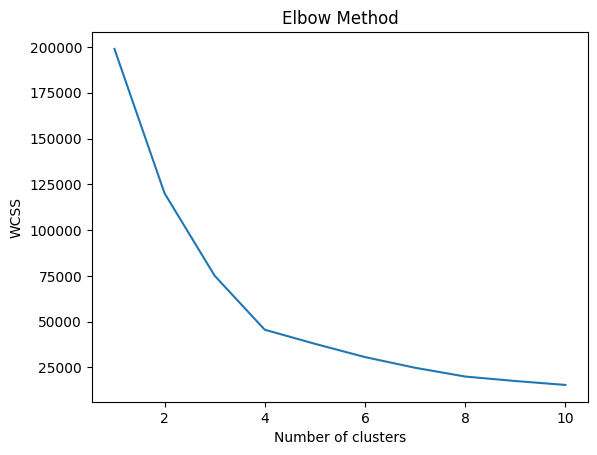

In [ ]:
wcss_gt = []
for i in range(1, 11):
    kmeans_gt = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_gt.fit(X_gt)
    wcss_gt.append(kmeans_gt.inertia_)

plt.plot(range(1, 11), wcss_gt)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### K=4

In [ ]:
kmeans_gt = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels_gt = kmeans_gt.fit_predict(X_gt)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroid_gt = kmeans_gt.cluster_centers_

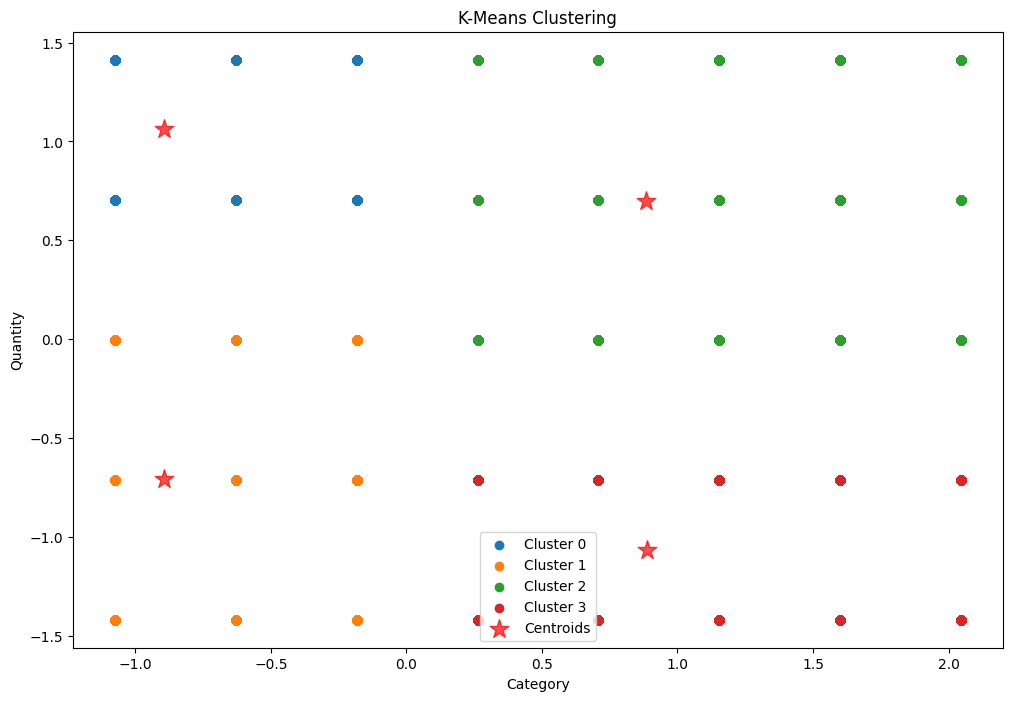

In [ ]:
# Visualisasi klaster
plt.figure(figsize=(12, 8))

# Memisahkan data berdasarkan klaster
for i in range(4):
    plt.scatter(X_gt[labels_gt == i, 0], X_gt[labels_gt == i, 1], label=f'Cluster {i}')

# Menampilkan centroid
plt.scatter(centroid_gt[:, 0], centroid_gt[:, 1], marker='*', c='red', s=200, alpha=0.7, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Category')
plt.ylabel('Quantity')

# Menambahkan legenda
plt.legend()

plt.show()

In [ ]:
centroid_gt

array([[-0.89402077,  1.06184593],
       [-0.89432356, -0.70662754],
       [ 0.88514158,  0.70001773],
       [ 0.88754084, -1.06705449]])

In [ ]:
df_new['claster_gt'] = labels_gt
df_new

# 0 : High Gender, High Price
# 1 : Medium Gender, Low Price
# 2 : Low Gender, Low Price
# 3 : Low Gender, Medium Price

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,unit_price,claster_qt,claster_ct,claster_at,claster_cq,claster_gt
0,I138884,C241288,0,28,0,5,1500.40,0,300.08,1,2,2,5,0
1,I317333,C111565,1,21,1,3,1800.51,1,600.17,1,3,2,2,1
2,I127801,C266599,1,20,0,1,300.08,2,300.08,0,2,6,4,1
3,I173702,C988172,0,66,1,5,3000.85,0,600.17,3,3,3,5,0
4,I337046,C189076,0,53,2,4,60.60,2,15.15,2,1,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,0,45,7,5,58.65,0,11.73,2,1,0,0,2
99453,I325143,C569580,1,27,4,2,10.46,2,5.23,0,1,6,1,3
99454,I824010,C103292,1,63,4,2,10.46,1,5.23,0,1,4,1,3
99455,I702964,C800631,1,56,6,4,4200.00,2,1050.00,3,0,5,0,2


In [ ]:
cluster_gt = df_new[df_new['claster_gt'] == 1]
cluster_gt

,invoice_no,customer_id,gender,age,category,quantity,total_prices,payment_method,unit_price,claster_qt,claster_ct,claster_at,claster_cq,claster_gt
1,I317333,C111565,1,21,1,3,1800.51,1,600.17,1,3,2,2,1
2,I127801,C266599,1,20,0,1,300.08,2,300.08,0,2,6,4,1
7,I293112,C176086,0,32,0,2,600.16,0,300.08,0,2,6,2,1
8,I293455,C159642,1,69,0,3,900.24,0,300.08,2,2,1,2,1
9,I326945,C283361,0,60,0,2,600.16,0,300.08,0,2,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99434,I186560,C117024,0,39,1,1,600.17,2,600.17,0,2,0,4,1
99435,I141871,C298790,0,62,0,3,900.24,2,300.08,2,2,1,2,1
99440,I887161,C137631,0,58,0,1,300.08,2,300.08,0,2,4,4,1
99449,I134399,C953724,1,65,0,1,300.08,2,300.08,0,2,4,4,1


## **Evaluasi Klastering**

In [ ]:
# Silhouette Score k=4 (quantity dan total_prices)
silhouette_qt = silhouette_score(X_qt, labels_qt)
print(f"Silhouette Score: {silhouette_qt}")

# Silhouette Score k=4 (category dan total_prices)
silhouette_ct = silhouette_score(X_ct, labels_ct)
print(f"Silhouette Score: {silhouette_ct}")

Silhouette Score: 0.5211745727646698
Silhouette Score: 0.6330487916660933


In [ ]:
silhouette_at = silhouette_score(X_at, labels_at)
print(f"Silhouette Score: {silhouette_at}")

Silhouette Score: 0.4511153528301823


In [ ]:
silhouette_cq = silhouette_score(X_cq, labels_cq)
print(f"Silhouette Score: {silhouette_cq}")

Silhouette Score: 0.47893680539825306


In [ ]:
silhouette_gt = silhouette_score(X_gt, labels_gt)
print(f"Silhouette Score: {silhouette_gt}")

Silhouette Score: 0.47482281000330334
